<a href="https://colab.research.google.com/github/Asma-Ahmed-Aqil-AL-Zubaidi/t5_week3/blob/main/Copy_of_Ensemble_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ensemble Methods Notebook
Welcome to the weekly project on Ensemble Methods. You will be working with a dataset of traffic jams.

## Dataset
The dataset that will be used in this task is `Traffic_Jam.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
This dataset contains traffic data including various counts of vehicle types across different times and days. Below are samples of these columns:

* `Time`: The timestamp of the traffic count (in intervals).
* `Date`: The day of the month the data was recorded.
* `Day of the Week`: The day of the week for the recorded data.
* `CarCount`: The number of cars counted during the time interval.
* `BikeCount`: The number of bikes counted during the time interval.
* `BusCount`: The number of buses counted during the time interval.
* `TruckCount`: The number of trucks counted during the time interval.
* `Total`: Total vehicles counted during the time interval.
* `Traffic Situation`: Qualitative assessment of the traffic (e.g., normal, congested).

## Goal
The primary goal of this exam is to develop a predictive model capable of determining the `Traffic Situation` based on your choice of features provided in the dataset. Students are expected to apply ensemble methods to build and evaluate their models.

# Import Libraries

In [202]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset


In [204]:
df=pd.read_csv("/content/drive/MyDrive/T5/4- Deep learning/1-Weekly Task/Datasets/Traffic_Jams.csv")

In [205]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/13_zKXfKmfx4BadtCQgJs7JnToamhp_ZvUE6Diiixeq0#gid=0


/usr/local/lib/python3.10/dist-packages/google/colab/sheets.py:31: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return frame.applymap(_clean_val).replace({np.nan: None})


# Exploratory Data Analysis (EDA)

Below are some steps and visualizations to perform EDA on the dataset:

1. **Summary Statistics**: Obtain summary statistics for the dataset to understand the central tendencies and dispersion of numerical features.describe()

2. **Distribution of the Target Variable**: Analyze the distribution of the target variable `Traffic Situation` to understand the class balance.

3. **Correlation Analysis**: Analyze correlations between features.

In [206]:
df.head()

Time  Date Day of the week  CarCount  BikeCount  BusCount  \
0  12:00:00 AM    10         Tuesday        13          2         2   
1  12:15:00 AM    10         Tuesday        14          1         1   
2  12:30:00 AM    10         Tuesday        10          2         2   
3  12:45:00 AM    10         Tuesday        10          2         2   
4   1:00:00 AM    10         Tuesday        11          2         1   

   TruckCount  Total Traffic Situation  
0          24     41            normal  
1          36     52            normal  
2          32     46            normal  
3          36     50            normal  
4          34     48            normal

In [207]:
df.shape

(6324, 9)

In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6324 entries, 0 to 6323
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               6324 non-null   object
 1   Date               6324 non-null   int64 
 2   Day of the week    6324 non-null   object
 3   CarCount           6324 non-null   int64 
 4   BikeCount          6324 non-null   int64 
 5   BusCount           6324 non-null   int64 
 6   TruckCount         6324 non-null   int64 
 7   Total              6324 non-null   int64 
 8   Traffic Situation  6324 non-null   object
dtypes: int64(6), object(3)
memory usage: 444.8+ KB


In [209]:
df.columns #'Time','Day of the week','Traffic Situation'

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

In [210]:
df.describe()

Date     CarCount    BikeCount     BusCount   TruckCount  \
count  6324.000000  6324.000000  6324.000000  6324.000000  6324.000000   
mean     16.043327    64.355629    12.013283    12.557875    18.658128   
std       8.956907    44.307088    11.363955    12.319831    10.724822   
min       1.000000     5.000000     0.000000     0.000000     0.000000   
25%       8.000000    18.000000     3.000000     1.000000    10.000000   
50%      16.000000    61.000000     9.000000    10.000000    18.000000   
75%      24.000000   101.250000    19.000000    20.000000    27.000000   
max      31.000000   180.000000    70.000000    50.000000    60.000000   

             Total  
count  6324.000000  
mean    107.584915  
std      55.850784  
min      21.000000  
25%      53.000000  
50%     103.000000  
75%     151.000000  
max     279.000000

In [211]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

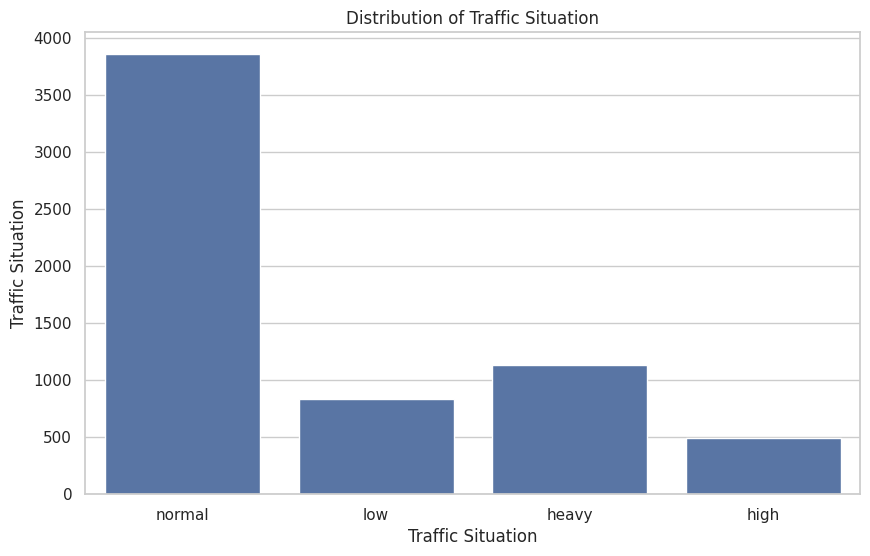

In [212]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Traffic Situation')
plt.xlabel('Traffic Situation')
plt.ylabel('Traffic Situation')
plt.title('Distribution of Traffic Situation')
plt.show()

<Axes: >

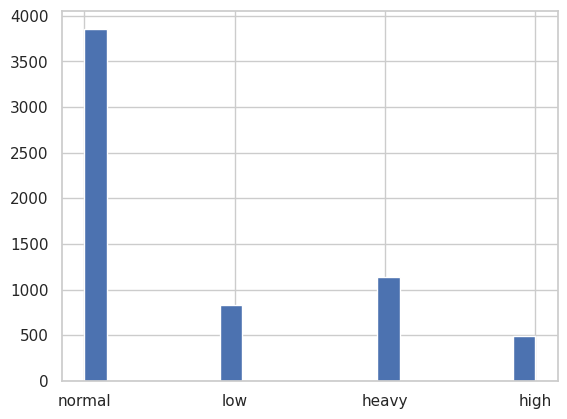

In [213]:
df['Traffic Situation'].hist(bins=20)

In [214]:
n_colummns=df.select_dtypes(include=["number"]).columns

In [215]:
df[n_colummns].corr()

Date  CarCount  BikeCount  BusCount  TruckCount     Total
Date        1.000000 -0.010507  -0.001985 -0.006166    0.021137 -0.006041
CarCount   -0.010507  1.000000   0.705941  0.664491   -0.583984  0.971386
BikeCount  -0.001985  0.705941   1.000000  0.581289   -0.585670  0.779261
BusCount   -0.006166  0.664491   0.581289  1.000000   -0.533847  0.763496
TruckCount  0.021137 -0.583984  -0.585670 -0.533847    1.000000 -0.508179
Total      -0.006041  0.971386   0.779261  0.763496   -0.508179  1.000000

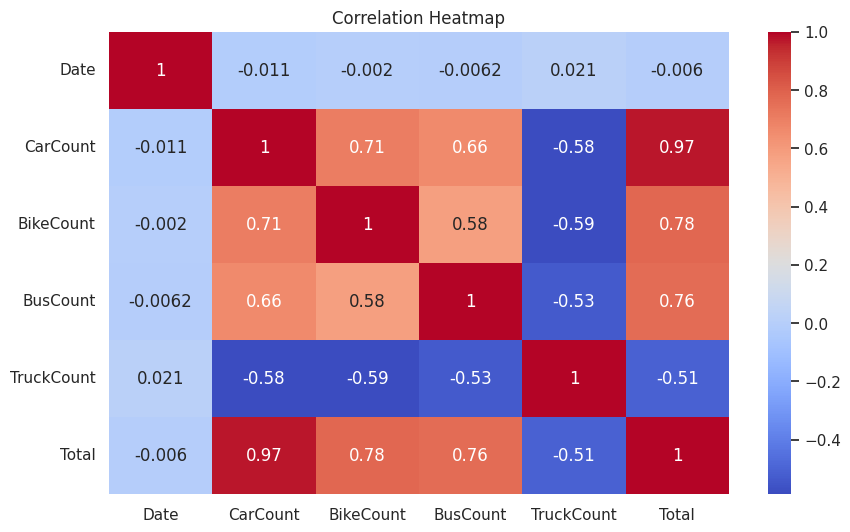

In [216]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[n_colummns].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Preprocess the data (if necessary)

Before building models, it's crucial to preprocess the data to ensure it's clean and suitable for training. Follow these steps to prepare the dataset:

1. **Check for Missing Values**: Determine if there are any missing values in the dataset and handle them appropriately. You can choose to fill them with a mean, median, or mode value, or drop rows with missing values if necessary.

2. **Encode Categorical Variables**: Convert categorical variables into numerical representations. This can be done using techniques such as one-hot encoding and lable-encoder.

3. **Feature Scaling**: Standardize or Normalize numerical features if needed to have a consistent scale.

4. **Remove Unnecessary Columns**: Drop any columns that are not relevant for modeling.

In [217]:
df.isnull().sum()

Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [218]:
import missingno as msno

<Axes: >

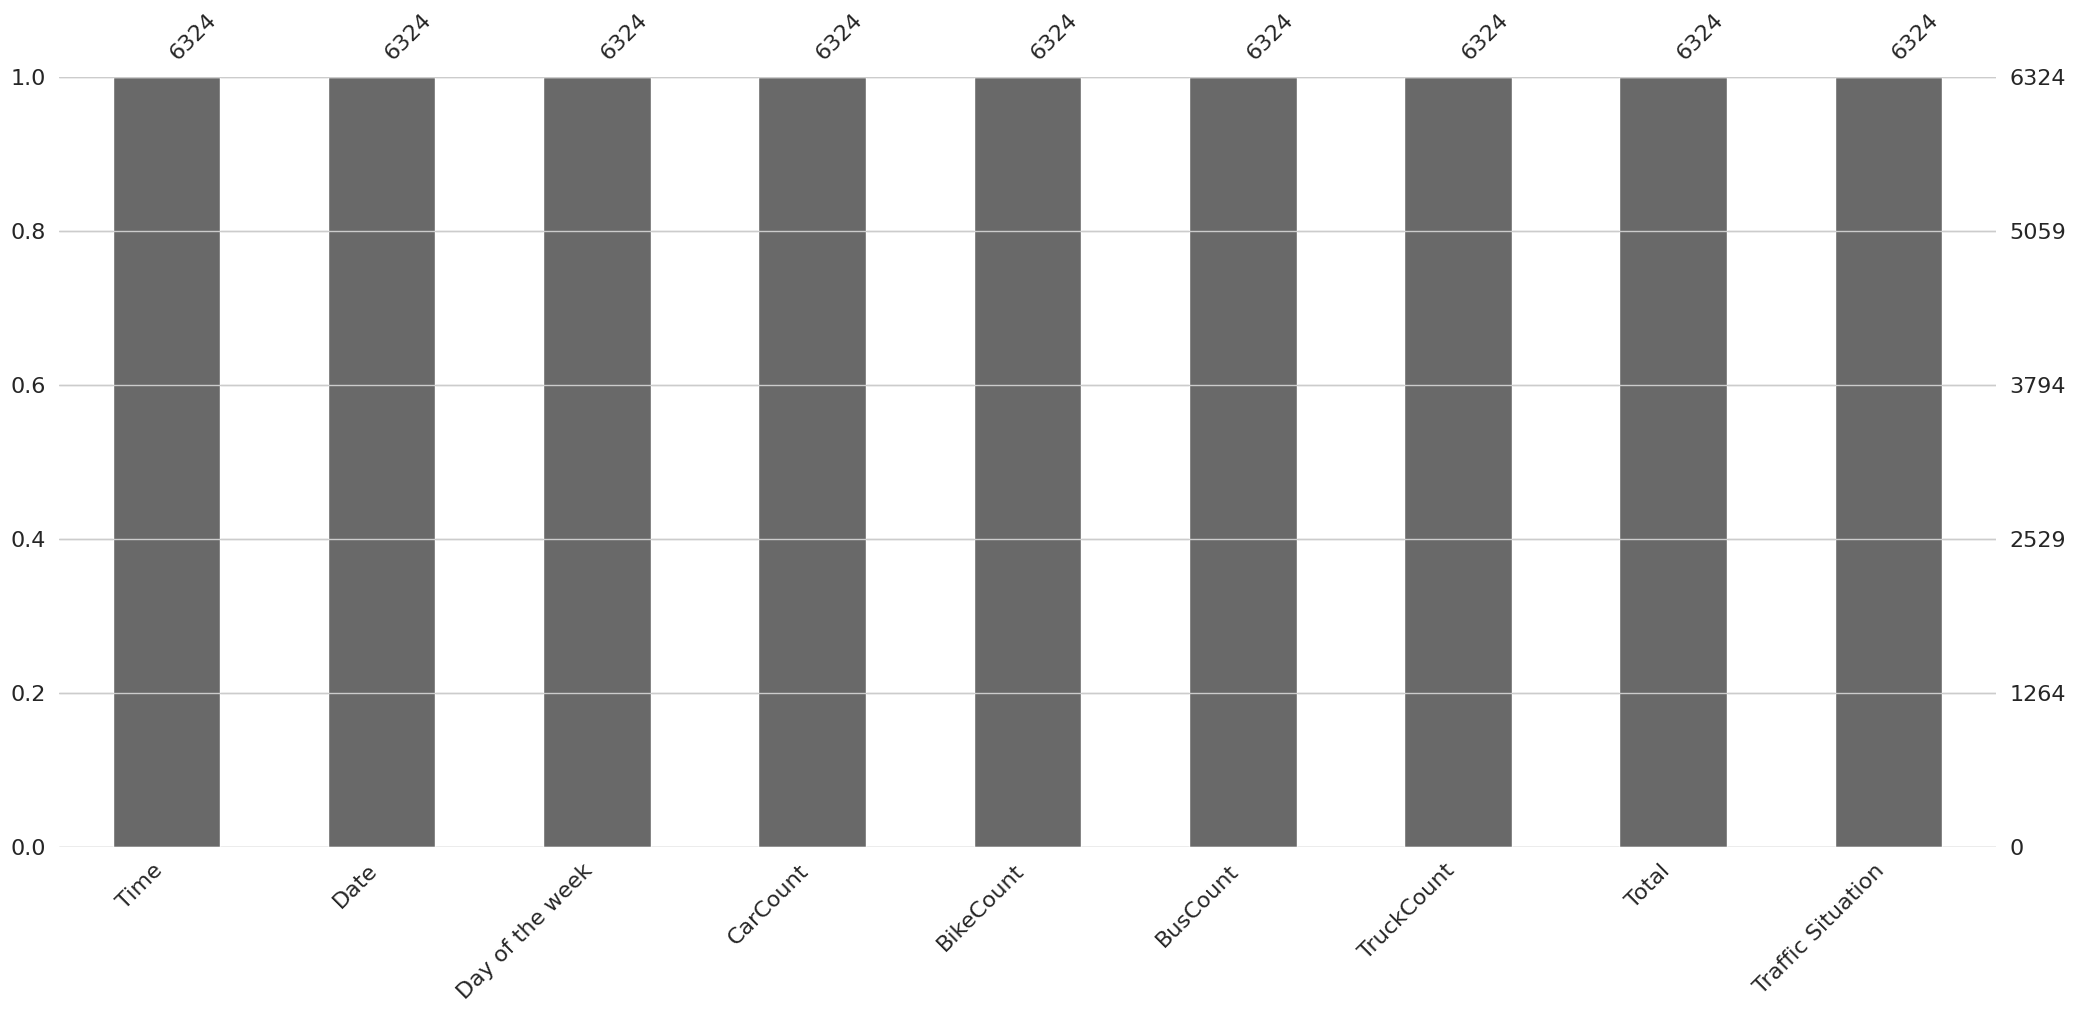

In [219]:
msno.bar(df)

<Axes: >

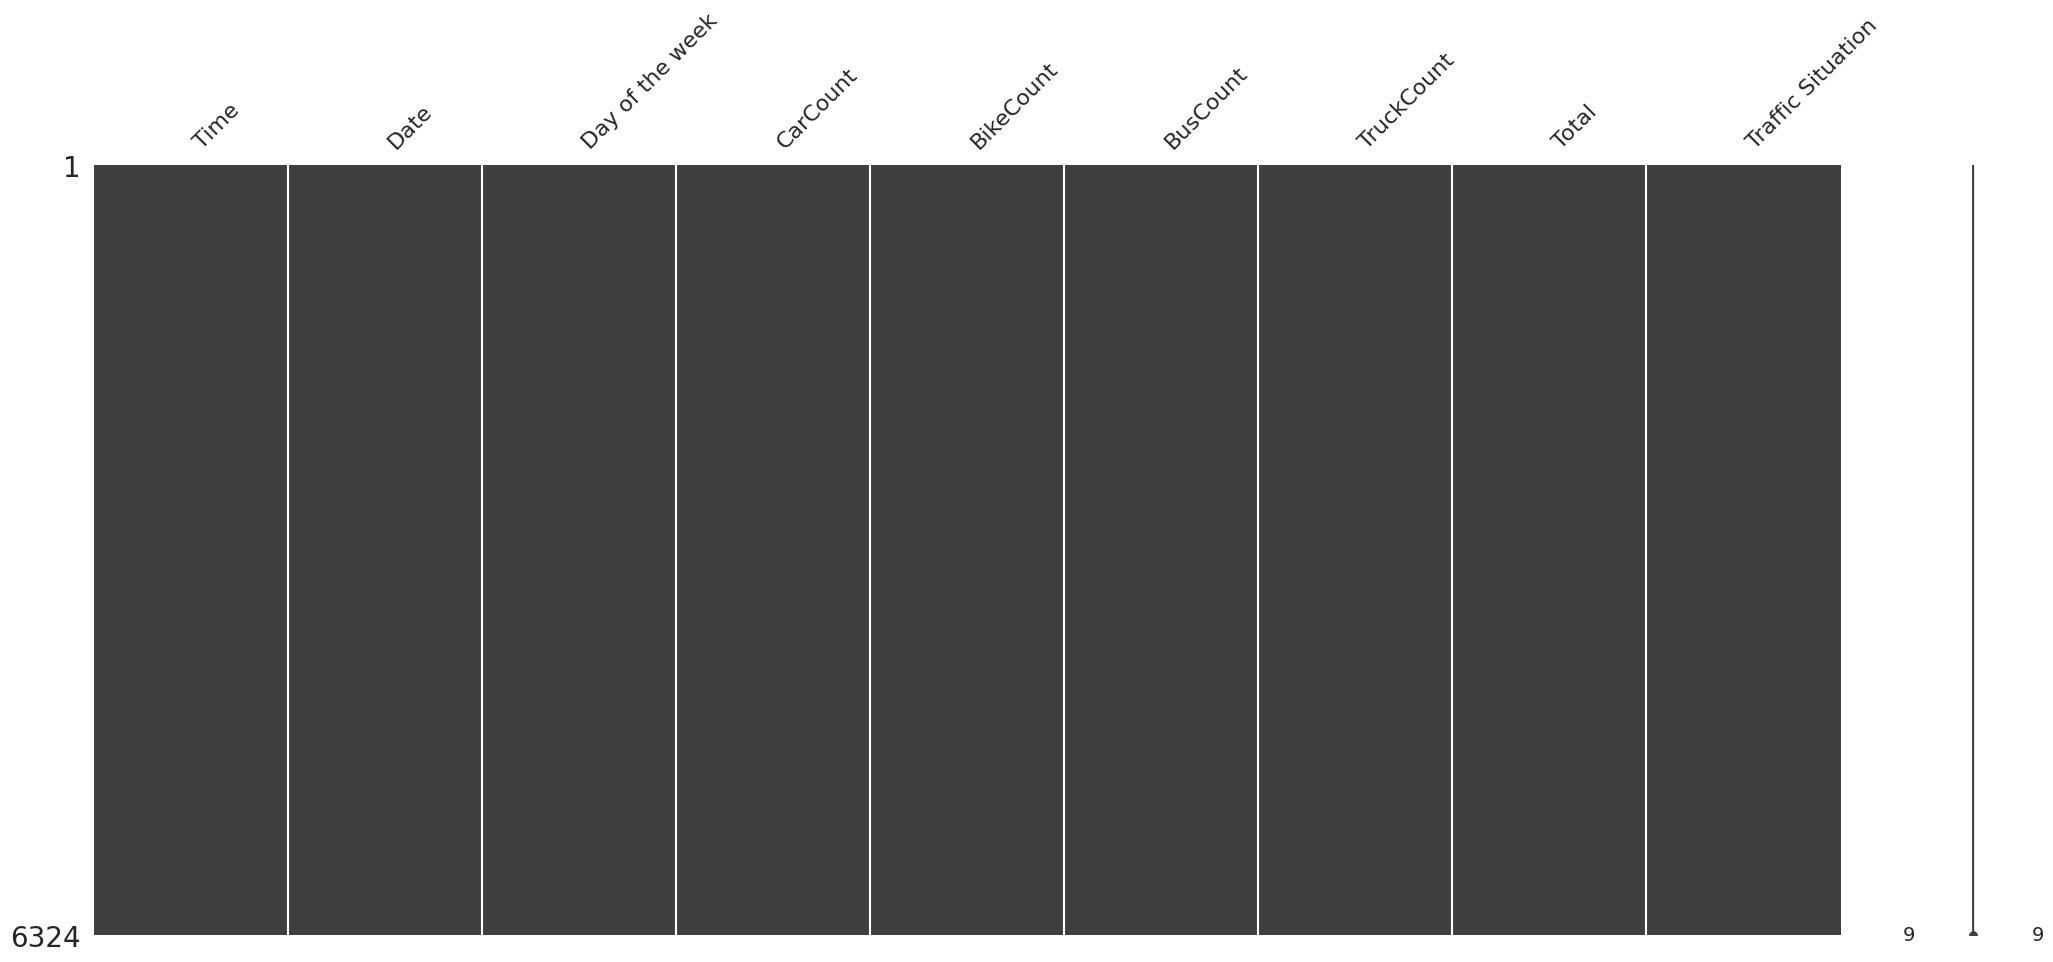

In [220]:
msno.matrix(df)

In [221]:
encoded_columns = pd.get_dummies(df[['Time','Day of the week','Traffic Situation']])


df = df.drop(['Time','Day of the week','Traffic Situation'], axis=1)


df = pd.concat([df, encoded_columns], axis=1)


print(df)

      Date  CarCount  BikeCount  BusCount  TruckCount  Total  \
0       10        13          2         2          24     41   
1       10        14          1         1          36     52   
2       10        10          2         2          32     46   
3       10        10          2         2          36     50   
4       10        11          2         1          34     48   
...    ...       ...        ...       ...         ...    ...   
6319     9        26         16        13          16     71   
6320     9        72         25        10          27    134   
6321     9       107         13        14          28    162   
6322     9       106         18        13          27    164   
6323     9        14          3         1          15     33   

      Time_10:00:00 AM  Time_10:00:00 PM  Time_10:15:00 AM  Time_10:15:00 PM  \
0                False             False             False             False   
1                False             False             False             

In [222]:
df.columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Time_10:00:00 AM', 'Time_10:00:00 PM', 'Time_10:15:00 AM',
       'Time_10:15:00 PM',
       ...
       'Day of the week_Monday', 'Day of the week_Saturday',
       'Day of the week_Sunday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday',
       'Traffic Situation_heavy', 'Traffic Situation_high',
       'Traffic Situation_low', 'Traffic Situation_normal'],
      dtype='object', length=113)

In [223]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()

df_StandardScaler=Scaler.fit_transform(df)

df_StandardScaler=pd.DataFrame(df_StandardScaler,columns=df.columns)

In [224]:
df_StandardScaler

Date  CarCount  BikeCount  BusCount  TruckCount     Total  \
0    -0.674765 -1.159175  -0.881214 -0.857050    0.498124 -1.192287   
1    -0.674765 -1.136604  -0.969218 -0.938226    1.617112 -0.995318   
2    -0.674765 -1.226890  -0.881214 -0.857050    1.244116 -1.102756   
3    -0.674765 -1.226890  -0.881214 -0.857050    1.617112 -1.031131   
4    -0.674765 -1.204319  -0.881214 -0.938226    1.430614 -1.066943   
...        ...       ...        ...       ...         ...       ...   
6319 -0.786419 -0.865746   0.350849  0.035890   -0.247868 -0.655099   
6320 -0.786419  0.172545   1.142889 -0.207639    0.777871  0.472996   
6321 -0.786419  0.962549   0.086836  0.117066    0.871120  0.974371   
6322 -0.786419  0.939977   0.526858  0.035890    0.777871  1.010184   
6323 -0.786419 -1.136604  -0.793209 -0.938226   -0.341117 -1.335537   

      Time_10:00:00 AM  Time_10:00:00 PM  Time_10:15:00 AM  Time_10:15:00 PM  \
0            -0.101907         -0.104257         -0.101907         -0.101907   
1            -0.101907         -0.104257         -0.101907         -0.101907   
2            -0.101907         -0.104257         -0.101907         -0.101907   
3            -0.101907         -0.104257         -0.101907         -0.101907   
4            -0.101907         -0.104257         -0.101907         -0.101907   
...                ...               ...               ...               ...   
6319         -0.101907         -0.104257         -0.101907         -0.101907   
6320         -0.101907         -0.104257         -0.101907         -0.101907   
6321         -0.101907         -0.104257         -0.101907         -0.101907   
6322         -0.101907         -0.104257         -0.101907         -0.101907   
6323         -0.101907         -0.104257         -0.101907         -0.101907   

      ...  Day of the week_Monday  Day of the week_Saturday  \
0     ...               -0.384358                 -0.385712   
1     ...               -0.384358                 -0.385712   
2     ...               -0.384358                 -0.385712   
3     ...               -0.384358                 -0.385712   
4     ...               -0.384358                 -0.385712   
...   ...                     ...                       ...   
6319  ...               -0.384358                 -0.385712   
6320  ...               -0.384358                 -0.385712   
6321  ...               -0.384358                 -0.385712   
6322  ...               -0.384358                 -0.385712   
6323  ...               -0.384358                 -0.385712   

      Day of the week_Sunday  Day of the week_Thursday  \
0                    -0.3849                 -0.438529   
1                    -0.3849                 -0.438529   
2                    -0.3849                 -0.438529   
3                    -0.3849                 -0.438529   
4                    -0.3849                 -0.438529   
...                      ...                       ...   
6319                 -0.3849                  2.280351   
6320                 -0.3849                  2.280351   
6321                 -0.3849                  2.280351   
6322                 -0.3849                  2.280351   
6323                 -0.3849                  2.280351   

      Day of the week_Tuesday  Day of the week_Wednesday  \
0                    2.292421                  -0.436477   
1                    2.292421                  -0.436477   
2                    2.292421                  -0.436477   
3                    2.292421                  -0.436477   
4                    2.292421                  -0.436477   
...                       ...                        ...   
6319                -0.436220                  -0.436477   
6320                -0.436220                  -0.436477   
6321                -0.436220                  -0.436477   
6322                -0.436220                  -0.436477   
6323                -0.436220                  -0.436477   

      Traffic Situati

In [225]:
df_StandardScaler.columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Time_10:00:00 AM', 'Time_10:00:00 PM', 'Time_10:15:00 AM',
       'Time_10:15:00 PM',
       ...
       'Day of the week_Monday', 'Day of the week_Saturday',
       'Day of the week_Sunday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday',
       'Traffic Situation_heavy', 'Traffic Situation_high',
       'Traffic Situation_low', 'Traffic Situation_normal'],
      dtype='object', length=113)

In [226]:
df_StandardScaler.shape

(6324, 113)

In [227]:
n_colummns=df.select_dtypes(include=["number"]).columns
df[n_colummns].corr()

Date  CarCount  BikeCount  BusCount  TruckCount     Total
Date        1.000000 -0.010507  -0.001985 -0.006166    0.021137 -0.006041
CarCount   -0.010507  1.000000   0.705941  0.664491   -0.583984  0.971386
BikeCount  -0.001985  0.705941   1.000000  0.581289   -0.585670  0.779261
BusCount   -0.006166  0.664491   0.581289  1.000000   -0.533847  0.763496
TruckCount  0.021137 -0.583984  -0.585670 -0.533847    1.000000 -0.508179
Total      -0.006041  0.971386   0.779261  0.763496   -0.508179  1.000000

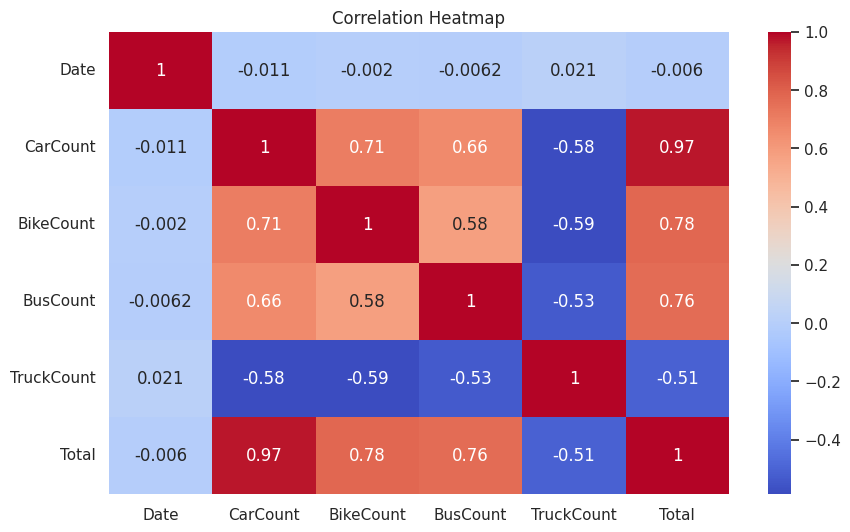

In [228]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[n_colummns].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Visualize the Data

Visualizing the data helps in understanding the relationships between features and the target variable. Below are some common visualizations that can be used to gain insights into the dataset:

1. **Count Plots for Categorical Features**: Use count plots to visualize the frequency of categorical features such as the `Traffic Situation`.

2. **Correlation Heatmap**: Create a heatmap to visualize the correlation between numerical features and identify any strong relationships.

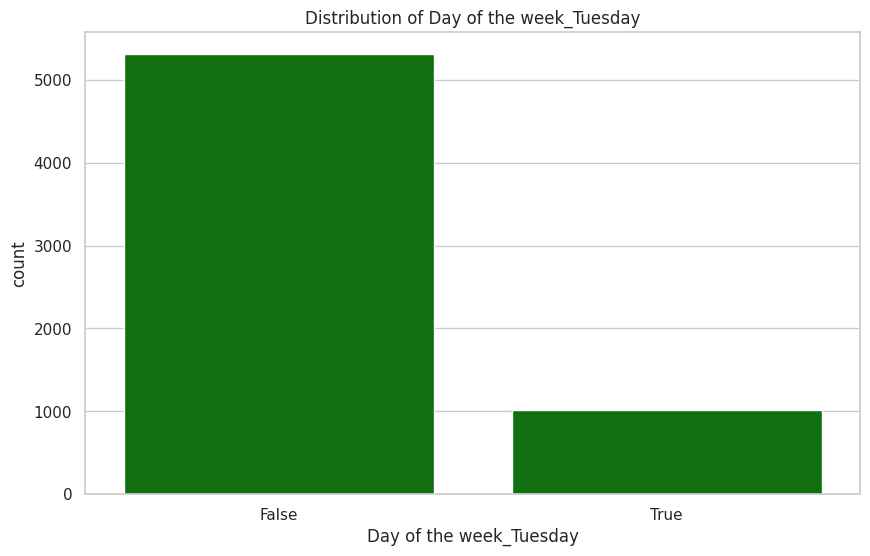

In [229]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df , x='Day of the week_Tuesday',color='green')
plt.title('Distribution of Day of the week_Tuesday')
plt.show()

In [230]:
df.columns

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Time_10:00:00 AM', 'Time_10:00:00 PM', 'Time_10:15:00 AM',
       'Time_10:15:00 PM',
       ...
       'Day of the week_Monday', 'Day of the week_Saturday',
       'Day of the week_Sunday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday',
       'Traffic Situation_heavy', 'Traffic Situation_high',
       'Traffic Situation_low', 'Traffic Situation_normal'],
      dtype='object', length=113)

<ipython-input-231-c22c5d5ef22a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation_heavy', data=df, ax=axes[0], palette='Set1')
<ipython-input-231-c22c5d5ef22a>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation_high', data=df, ax=axes[1], palette='Set2')
<ipython-input-231-c22c5d5ef22a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Traffic Situation_low', data=df, ax=axes[2], palette='Set3')


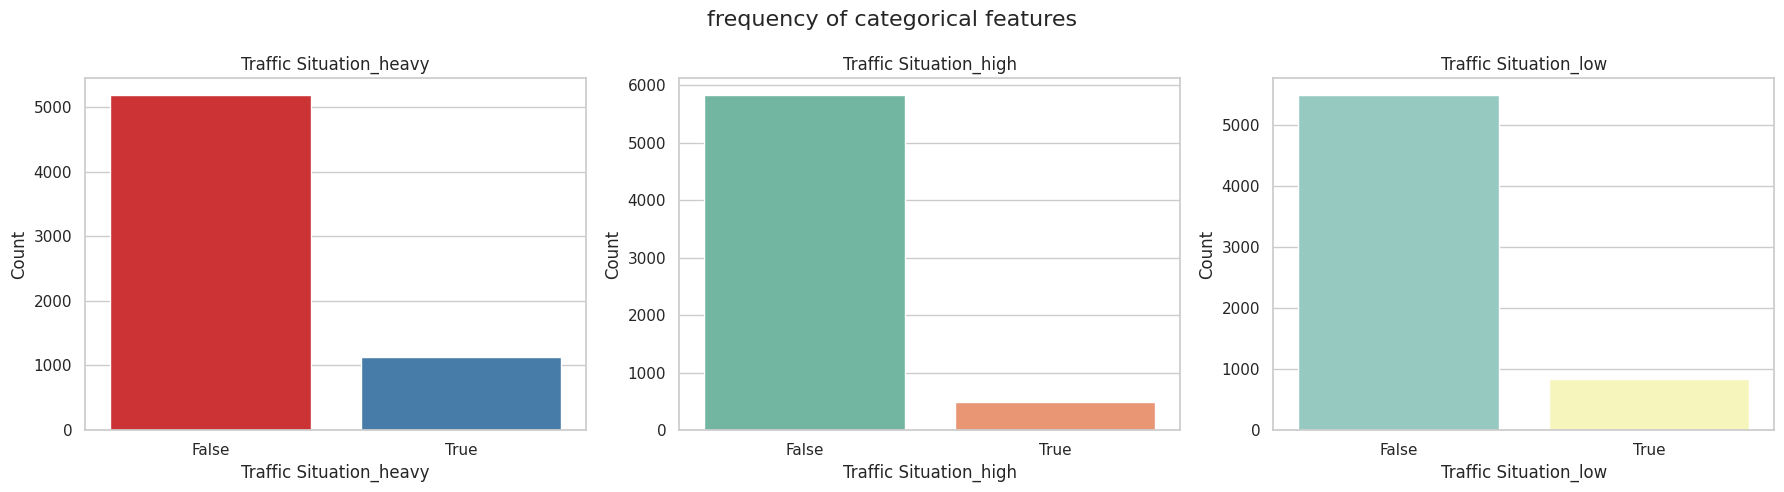

In [231]:
sns.set(style="whitegrid")


fig, axes = plt.subplots(1, 3, figsize=(18, 5))


sns.countplot(x='Traffic Situation_heavy', data=df, ax=axes[0], palette='Set1')
axes[0].set_title('Traffic Situation_heavy')
axes[0].set_xlabel('Traffic Situation_heavy')
axes[0].set_ylabel('Count')


sns.countplot(x='Traffic Situation_high', data=df, ax=axes[1], palette='Set2')
axes[1].set_title('Traffic Situation_high')
axes[1].set_xlabel('Traffic Situation_high')
axes[1].set_ylabel('Count')


sns.countplot(x='Traffic Situation_low', data=df, ax=axes[2], palette='Set3')
axes[2].set_title('Traffic Situation_low')
axes[2].set_ylabel('Count')



plt.suptitle('frequency of categorical features', fontsize=16)
plt.tight_layout()
plt.show()

In [232]:
n_colummns=df_StandardScaler.select_dtypes(include=["number"]).columns

df_StandardScaler[n_colummns].corr()

Date  CarCount  BikeCount  BusCount  \
Date                       1.000000 -0.010507  -0.001985 -0.006166   
CarCount                  -0.010507  1.000000   0.705941  0.664491   
BikeCount                 -0.001985  0.705941   1.000000  0.581289   
BusCount                  -0.006166  0.664491   0.581289  1.000000   
TruckCount                 0.021137 -0.583984  -0.585670 -0.533847   
...                             ...       ...        ...       ...   
Day of the week_Wednesday -0.171527  0.007614  -0.020969  0.031911   
Traffic Situation_heavy   -0.009713  0.700815   0.603145  0.606882   
Traffic Situation_high     0.010751  0.107713   0.042609  0.195833   
Traffic Situation_low     -0.016183 -0.175502  -0.125320 -0.245878   
Traffic Situation_normal   0.012954 -0.489345  -0.411405 -0.415094   

                           TruckCount     Total  Time_10:00:00 AM  \
Date                         0.021137 -0.006041         -0.002068   
CarCount                    -0.583984  0.971386         -0.001207   
BikeCount                   -0.585670  0.779261          0.030235   
BusCount                    -0.533847  0.763496          0.063219   
TruckCount                   1.000000 -0.508179         -0.037540   
...                               ...       ...               ...   
Day of the week_Wednesday    0.008204  0.010388         -0.001718   
Traffic Situation_heavy     -0.457367  0.724729         -0.023216   
Traffic Situation_high       0.146367  0.165423          0.046183   
Traffic Situation_low       -0.252577 -0.267465          0.006616   
Traffic Situation_normal     0.454718 -0.476157         -0.011745   

                           Time_10:00:00 PM  Time_10:15:00 AM  \
Date                              -0.000162          0.002833   
CarCount                          -0.121198          0.004136   
BikeCount                         -0.088635          0.028993   
BusCount                          -0.102297          0.071873   
TruckCount                         0.072235         -0.038563   
...                                     ...               ...   
Day of the week_Wednesday          0.008858         -0.001718   
Traffic Situation_heavy           -0.048812         -0.015050   
Traffic Situation_high            -0.030382          0.034509   
Traffic Situation_low              0.004677         -0.002651   
Traffic Situation_normal           0.051918         -0.005316   

                           Time_10:15:00 PM  ...  Day of the week_Monday  \
Date                               0.002483  ...                0.116606   
CarCount                          -0.119119  ...               -0.002840   
BikeCount                         -0.091734  ...               -0.028872   
BusCount                          -0.097394  ...                0.031388   
TruckCount                         0.083510  ...                0.013002   
...                                     ...  ...                     ...   
Day of the week_Wednesday         -0.001718  ...               -0.167764   
Traffic Situation_heavy           -0.047712  ...               -0.001660   
Traffic Situation_high            -0.029697  ...                0.009292   
Traffic Situation_low             -0.002651  ...               -0.018629   
Traffic Situation_normal           0.055759  ...                0.009113   

                           Day of the week_Saturday  Day of the week_Sunday  \
Date                                       0.032840                0.069238   
CarCount                                  -0.000183                0.006524   
BikeCount                                 -0.010066               -0.018881   
BusCount                                   0.022713                0.031581   
TruckCount                                 0.008124                0.019220   
...                                             ...                     ...   
Day of the week_Wednesday                 -0.168354               -0.168000   
Traffic Situation_heavy            

In [233]:
plt.figure(figsize=(100, 100))
sns.heatmap(df_StandardScaler[n_colummns].corr(), annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

# Split the Dataset

1. **Define Features and Target**: Separate the dataset into features (`X`) and the target variable (`y`).

2. **Train-Test Split**: Use the `train_test_split` function from `sklearn.model_selection` to split the data.

In [234]:
from sklearn.model_selection import train_test_split

In [235]:
df_StandardScaler.columns#Traffic Situation

Index(['Date', 'CarCount', 'BikeCount', 'BusCount', 'TruckCount', 'Total',
       'Time_10:00:00 AM', 'Time_10:00:00 PM', 'Time_10:15:00 AM',
       'Time_10:15:00 PM',
       ...
       'Day of the week_Monday', 'Day of the week_Saturday',
       'Day of the week_Sunday', 'Day of the week_Thursday',
       'Day of the week_Tuesday', 'Day of the week_Wednesday',
       'Traffic Situation_heavy', 'Traffic Situation_high',
       'Traffic Situation_low', 'Traffic Situation_normal'],
      dtype='object', length=113)

In [239]:
X=df_StandardScaler.drop('Traffic Situation_heavy',axis=1)
y=df_StandardScaler['Traffic Situation_heavy']

In [240]:
X_train,X_test ,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

# Initialize and Train the Classifiers

## Bagging
Chose the bagging model to go with and initialize and train a the model.

In [249]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)


print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 4.983217822480312e-29
R-squared: 1.0


### Evaluate the model performance

In [246]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix ,precision_score, recall_score, f1_score



In [251]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

y_pred = rfr.predict(X_test)

print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', mean_squared_error(y_test, y_pred, squared=False))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Squared Error: 4.983217822480312e-29
Root Mean Squared Error: 7.059191046062085e-15
Mean Absolute Error: 4.888272483324874e-15
R-squared: 1.0


## Boosting
Chose the Boosting model to go with and initialize and train a the model.

In [257]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder


y_train_array = y_train.to_numpy()


le = LabelEncoder()


y_train_encoded = le.fit_transform(y_train_array)


xgb_classifier = xgb.XGBClassifier(random_state=42)


xgb_classifier.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [260]:
import numpy as np
from sklearn.metrics import accuracy_score


y_predS_binary = (y_predS > 0.5).astype(int)

In [ ]:
y_predX=xgb_classifier.predict(X_test)

### Evaluate the model performance

In [264]:
# Check the unique values in y_test
print(np.unique(y_test))

# If y_test contains continuous values, you might need to binarize it:
threshold = 0  # Set an appropriate threshold value here
y_test_binary = (y_test > threshold).astype(int)

# Now use the binarized y_test for your metrics:
accuracyS = accuracy_score(y_test_binary, y_predS_binary)
precisionS = precision_score(y_test_binary, y_predS_binary)
recallS = recall_score(y_test_binary, y_predS_binary)
f1S = f1_score(y_test_binary, y_predS_binary)

print("Accuracy:", accuracyS)
print("Precision:", precisionS)
print("Recall:", recallS)
print("F1 Score:", f1S)

[-0.46818997  2.13588513]
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


## Stacking Classifier
Combine the previous classifiers as the base models using a Stacking Classifier.

In [266]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression


base_models = [
    ('decision_tree', DecisionTreeRegressor(random_state=42)),
    ('svr', SVR()),
    ('knn', KNeighborsRegressor()),
    ('random_forest', RandomForestRegressor(random_state=42))
]


meta_model = LinearRegression()


stacking_regressor = StackingRegressor(estimators=base_models, final_estimator=meta_model)


stacking_regressor.fit(X_train, y_train)

StackingRegressor(estimators=[('decision_tree',
                               DecisionTreeRegressor(random_state=42)),
                              ('svr', SVR()), ('knn', KNeighborsRegressor()),
                              ('random_forest',
                               RandomForestRegressor(random_state=42))],
                  final_estimator=LinearRegression())

### Define meta-learner (LogisticRegression)

In [ ]:
meta_model = LinearRegression()


### Initialize and Train the Stacking Classifier

Stacking combines multiple models (base learners) using a meta-learner. The meta-learner is trained on the predictions of the base learners to make the final prediction.

In [272]:
from sklearn.preprocessing import LabelEncoder


y_train_array = y_train.to_numpy()

label_encoder = LabelEncoder()


y_train_encoded = label_encoder.fit_transform(y_train_array)


stacking_classifier.fit(X_train, y_train_encoded)


y_predS_encoded = stacking_classifier.predict(X_test)
y_predS = label_encoder.inverse_transform(y_predS_encoded)

### Evaluate the model performance

In [271]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate regression metrics
mseS = mean_squared_error(y_test, y_predS)
rmseS = mean_squared_error(y_test, y_predS, squared=False)  # RMSE
maeS = mean_absolute_error(y_test, y_predS)
r2S = r2_score(y_test, y_predS)

print("Mean Squared Error:", mseS)
print("Root Mean Squared Error:", rmseS)
print("Mean Absolute Error:", maeS)
print("R-squared:", r2S)

Mean Squared Error: 0.0
Root Mean Squared Error: 0.0
Mean Absolute Error: 0.0
R-squared: 1.0


# Notebook Questions:

After completing the tasks in this notebook, take some time to reflect on the work you have done and answer the following questions. These questions are designed to help you think critically about the steps you took and the decisions you made.

* **Feature Selection and Engineering**
   - Which features did you find most important for predicting churn, and why do you think they are significant?
   - Did you perform any feature engineering? If so, what new features did you create, and how did they improve the model performance?

* **Model Selection**
   - Why did you choose the specific ensemble methods you implemented? What are the advantages of using ensemble methods over single models?
   - Compare the performance of different models you used. Which model performed the best, and what do you think contributed to its success?

* **Model Evaluation**
   - Which evaluation metrics did you use to assess the model performance, and why? What insights did these metrics provide about the models' strengths and weaknesses?


# Answer here:

I think that all columns are important, so keep them in mind, and specify the relationship between the columns. The code is not in the best condition and can be accepted, for the limits of time.

I chose 6 templates and three different ways to embed them
